# Read Data

In [25]:
file_path = 'data/sp500/SP500.csv'
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3266000 entries, 0 to 3265999
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Ticker          object 
 1   Date            object 
 2   Low             float64
 3   Open            float64
 4   Volume          float64
 5   High            float64
 6   Close           float64
 7   Adjusted Close  float64
dtypes: float64(6), object(2)
memory usage: 199.3+ MB


In [26]:
df.describe()

,Low,Open,Volume,High,Close,Adjusted Close
count,3.258423e+06,3.258423e+06,3.258423e+06,3.258423e+06,3.258423e+06,3.258423e+06
mean,3.821284e+02,3.849360e+02,5.064393e+06,3.881214e+02,3.851922e+02,3.783433e+02
std,8.803883e+03,8.874080e+03,3.072309e+07,8.933282e+03,8.868704e+03,8.868953e+03
min,1.000000e-05,0.000000e+00,0.000000e+00,1.000000e-05,1.000000e-05,-2.799133e+02
25%,7.900000e+00,7.680000e+00,3.658000e+05,8.125000e+00,8.000000e+00,4.141712e+00
50%,2.345833e+01,2.369754e+01,1.232220e+06,2.405688e+01,2.377000e+01,1.595139e+01
75%,5.196863e+01,5.243404e+01,3.357400e+06,5.317000e+01,5.258000e+01,4.232024e+01
max,5.333450e+05,5.443890e+05,7.421641e+09,5.443890e+05,5.391800e+05,5.391800e+05


In [27]:
print("Number of null values per column:")
counts = df.count().to_frame()
counts.columns = ['count']
counts['nulls'] = df.shape[0] - counts['count']
counts

Number of null values per column:


,count,nulls
Ticker,3266000,0
Date,3266000,0
Low,3258423,7577
Open,3258423,7577
Volume,3258423,7577
High,3258423,7577
Close,3258423,7577
Adjusted Close,3258423,7577


In [28]:
#check it there are rows with the same ticker and date
df.duplicated(['Ticker', 'Date']).sum()

0

In [29]:
df.head()

,Ticker,Date,Low,Open,Volume,High,Close,Adjusted Close
0,A,1999-11-18,28.612303,32.546494,62546380.0,35.765381,31.473534,26.929760
1,A,1999-11-19,28.478184,30.713518,15234146.0,30.758226,28.880545,24.711119
2,A,1999-11-22,28.657009,29.551144,6577870.0,31.473534,31.473534,26.929760
3,A,1999-11-23,28.612303,30.400572,5975611.0,31.205294,28.612303,24.481602
4,A,1999-11-24,28.612303,28.701717,4843231.0,29.998213,29.372318,25.131901


# Data Exploration

### Rank the ticker by max adjusted close

In [30]:
#To get the highest 'Adjusted Close' value for each unique ticker, we'll group by the 'Ticker' column
# and then use the agg() function to get the maximum 'Adjusted Close' value for each group.

# Group by 'Ticker' and get the maximum 'Adjusted Close' for each
highest_adjusted_close_per_ticker = df.groupby('Ticker')['Adjusted Close'].max()

# Sort the values in descending order to get the highest values at the top
highest_adjusted_close_per_ticker_sorted = highest_adjusted_close_per_ticker.sort_values(ascending=False)

highest_adjusted_close_per_ticker_sorted.round(2)

Ticker
BRK-A    539180.00
INTH      11250.00
RIBT      10000.00
NVR        5959.33
AZO        2579.00
           ...    
UEEC          2.45
FRMC          1.99
XLEFF         0.80
RXMD          0.55
BHI           0.08
Name: Adjusted Close, Length: 409, dtype: float64

### Percentage of missing value for each ticker

In [31]:
# Count the missing values for 'Adjusted Close' for each ticker
missing_counts = df[df['Adjusted Close'].isnull()].groupby('Ticker').size()

# Count the total number of rows for each ticker
total_counts = df.groupby('Ticker').size()

# Calculate the percentage of missing values for each ticker
missing_percentage = (missing_counts / total_counts * 100).sort_values(ascending=False)

missing_percentage

Ticker
BHI     82.053654
CTQ     54.536047
CNWT    13.715830
INTH    13.023835
SONC    12.760644
          ...    
XYL           NaN
YUM           NaN
ZBH           NaN
ZION          NaN
ZTS           NaN
Length: 409, dtype: float64

### Print all the ticker with missing values

/Users/francescomattioli/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/francescomattioli/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/francescomattioli/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


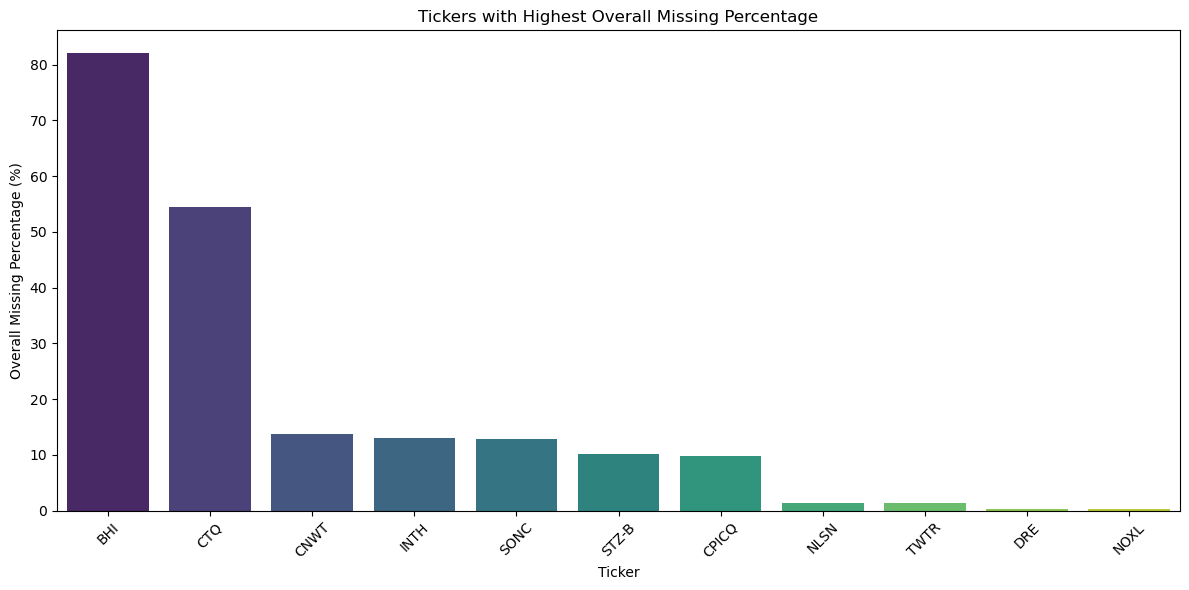

In [37]:
import matplotlib.dates as mdates
import seaborn as sn
missing = pd.read_csv("data/sp500/missing_values.csv")
# Select the top tickers with the highest 'Overall Missing Percentage'
tot_missing = missing.dropna(subset=['Overall Missing Percentage'])\
                        .drop_duplicates(subset=['Ticker'])\
                        .nlargest(11, 'Overall Missing Percentage')

# Plot
plt.figure(figsize=(12, 6))
sn.barplot(data=tot_missing, x='Ticker', y='Overall Missing Percentage', palette='viridis')
plt.title('Tickers with Highest Overall Missing Percentage')
plt.ylabel('Overall Missing Percentage (%)')
plt.xlabel('Ticker')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Missing value tickers by year

/Users/francescomattioli/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/francescomattioli/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/francescomattioli/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/francescomattioli/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/seaborn/_oldcore.py:1

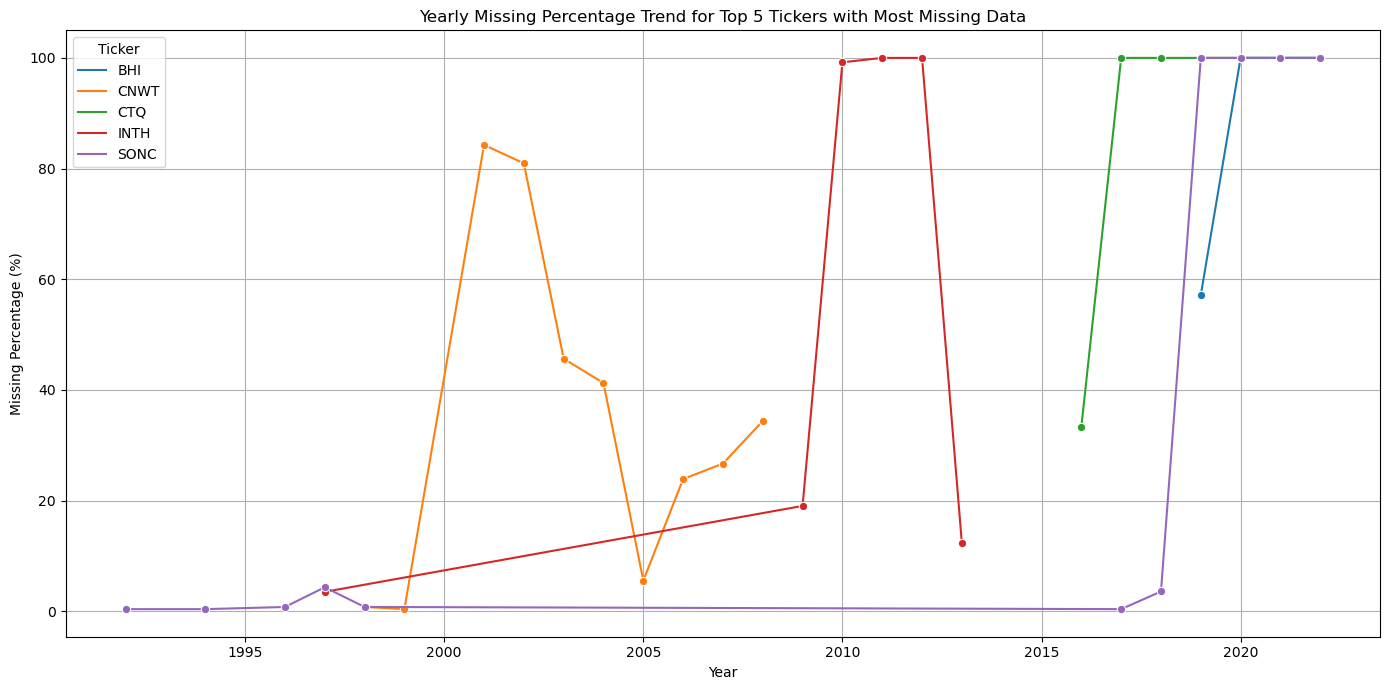

/Users/francescomattioli/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/francescomattioli/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/francescomattioli/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/francescomattioli/opt/miniconda3/envs/DataMining/lib/python3.10/site-packages/seaborn/_oldcore.py:1

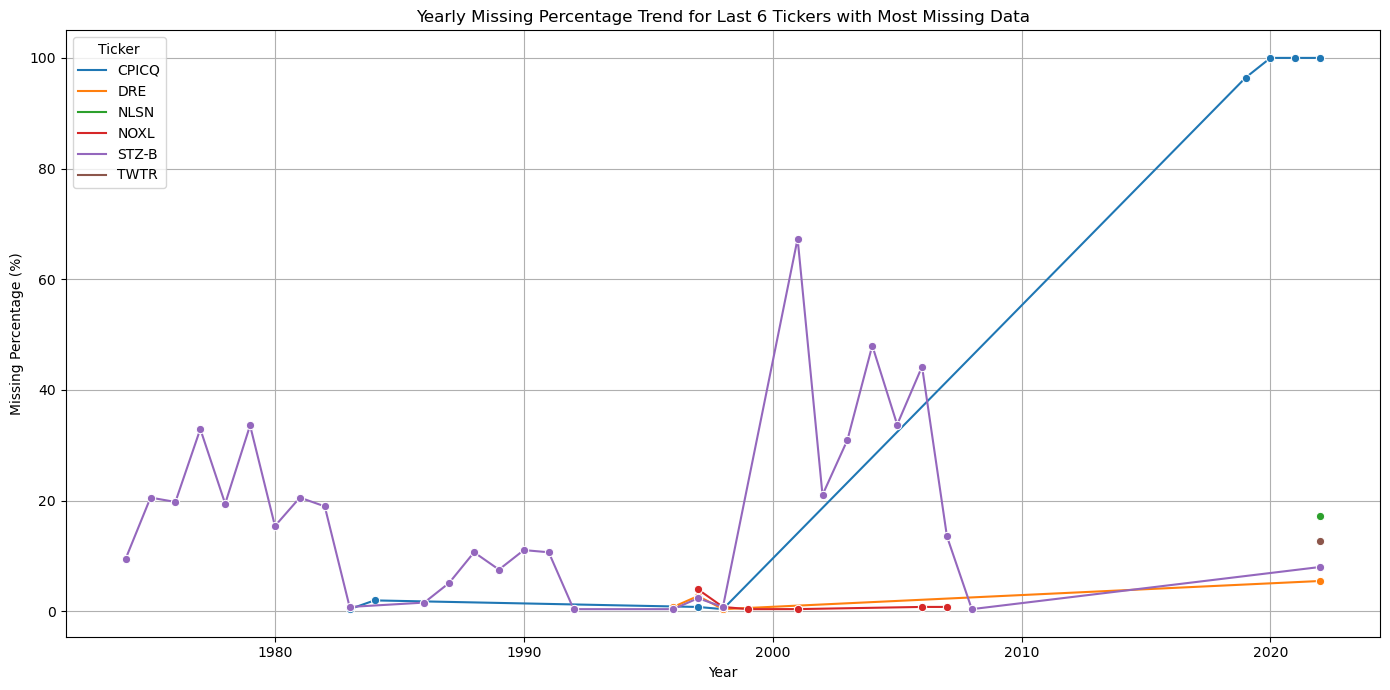

In [51]:
for i in range(1,3):
    # Select a few tickers from the top missing for visualization
    if i==1:
        selected_tickers = tot_missing['Ticker'].head(5).tolist()
        title = 'Yearly Missing Percentage Trend for Top 5 Tickers with Most Missing Data'
    else:
        selected_tickers = tot_missing['Ticker'].tail(6).tolist()
        title = 'Yearly Missing Percentage Trend for Last 6 Tickers with Most Missing Data'

    # Filter data for these tickers
    selected_data = missing[missing['Ticker'].isin(selected_tickers)]

    # Line plot
    plt.figure(figsize=(14, 7))
    sn.lineplot(data=selected_data, x='Year', y='Missing Percentage', hue='Ticker', marker='o')
    plt.title(title)
    plt.ylabel('Missing Percentage (%)')
    plt.xlabel('Year')
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title='Ticker')
    plt.show()


### Number of impressions for each year

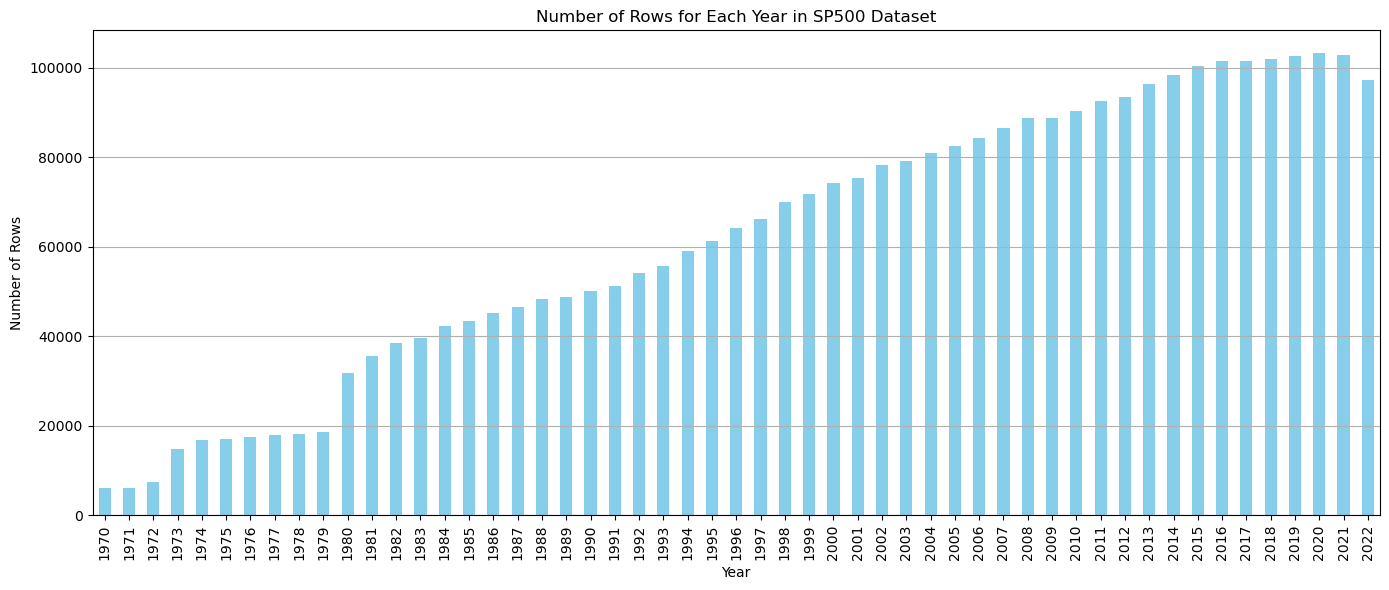

In [60]:
import pandas as pd
import matplotlib.pyplot as plt


# Reload the SP500 dataset
df = pd.read_csv('data/sp500/SP500.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Count the number of rows for each year
rows_per_year = df.groupby('Year').size()

# Plotting
plt.figure(figsize=(14, 6))
rows_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Rows for Each Year in SP500 Dataset')
plt.xlabel('Year')
plt.ylabel('Number of Rows')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
